1. Find-s Algorithm 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("Finds.csv")
attribute = np.array(data)[:, :-1]
target = np.array(data)[:, -1]
print(attribute)
print(target)

def train(att, tar):
    specific_h = None

    for i, val in enumerate(tar):
        if val == 'yes':
            specific_h = att[i].copy()
            print(f"Initial specific hypothesis (first 'yes' instance): {specific_h}")
            break

    for i, val in enumerate(att):
        if tar[i] == 'yes':
            print(f"\nConsidering instance {i + 1}: {val}")
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x] = '?'
            print(f"Updated specific hypothesis: {specific_h}")

    return specific_h

specific_hypothesis = train(attribute, target)
print("\nFinal specific hypothesis:", specific_hypothesis)


[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
Initial specific hypothesis (first 'yes' instance): ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Considering instance 1: ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Updated specific hypothesis: ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Considering instance 2: ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
Updated specific hypothesis: ['sunny' 'warm' '?' 'strong' 'warm' 'same']

Considering instance 4: ['sunny' 'warm' 'high' 'strong' 'cool' 'change']
Updated specific hypothesis: ['sunny' 'warm' '?' 'strong' '?' '?']

Final specific hypothesis: ['sunny' 'warm' '?' 'strong' '?' '?']


2. Candidate Elimination Algorithm

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("Finds.csv")

concept = np.array(data)[:,:-1]
target = np.array(data)[:,-1]

def train(con, tar):
    specific_h = con[0].copy()
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    
    for i, val in enumerate(con):
        if tar[i] == 'yes':
            for x in range(len(specific_h)):
                if val[x]!= specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        else:
            for x in range(len(specific_h)):
                if val[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        
        print("Iteration["+ str(i+1) +"]")
        print("Specific: "+str(specific_h))
        print("General: "+str(general_h)+"\n\n")
        
    general_h = [general_h[i] for i, val in enumerate(general_h) if val!= ['?' for _ in range(len(specific_h))]]
    return specific_h, general_h  

specific, general = train(concept, target)

print("Final hypothesis :-")
print("Specific hypothesis:" +str(specific))
print("General hypothesis:" +str(general))

Iteration[1]
Specific: ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
General: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


Iteration[2]
Specific: ['sunny' 'warm' '?' 'strong' 'warm' 'same']
General: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


Iteration[3]
Specific: ['sunny' 'warm' '?' 'strong' 'warm' 'same']
General: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]


Iteration[4]
Specific: ['sunny' 'warm' '?' 'strong' '?' '?']
General: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']

3. Decision Tree 

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

def build_decision_tree(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X, y)
    return tree

def print_tree(tree, feature_names):
    tree_rules = export_text(tree, feature_names=feature_names)
    print(tree_rules)

# Read data from CSV
data = read_csv('3ds.csv')

# Build and print decision tree
tree = build_decision_tree(data)
print_tree(tree, list(data.columns[:-1]))

|--- Feature2 <= 3.50
|   |--- class: 0
|--- Feature2 >  3.50
|   |--- Feature3 <= 7.50
|   |   |--- class: 1
|   |--- Feature3 >  7.50
|   |   |--- Feature2 <= 9.50
|   |   |   |--- class: 0
|   |   |--- Feature2 >  9.50
|   |   |   |--- Feature3 <= 13.50
|   |   |   |   |--- class: 1
|   |   |   |--- Feature3 >  13.50
|   |   |   |   |--- Feature3 <= 16.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature3 >  16.50
|   |   |   |   |   |--- class: 1



4. Nueral Network 

11490434/11490434 [==============================] - 4s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2530 - accuracy: 0.9276 - val_loss: 0.1305 - val_accuracy: 0.9602
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1114 - accuracy: 0.9674 - val_loss: 0.0943 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0776 - accuracy: 0.9772 - val_loss: 0.0856 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0826 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0721 - val_accuracy: 0.9767
313/313 - 0s - loss: 0.0721 - accuracy: 0.9767 - 261ms/epoch - 833us/step

Test accuracy: 0.9767000079154968


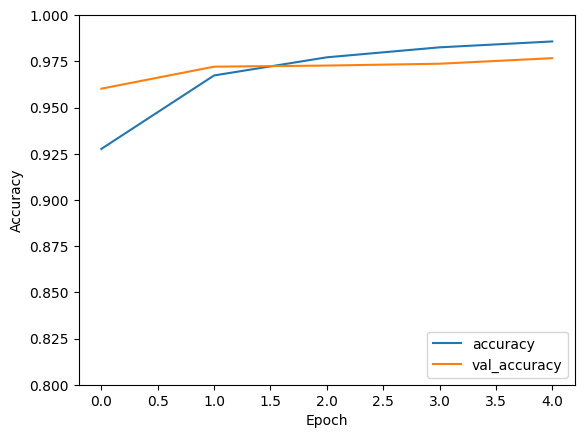

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Loss function used for classification tasks
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


5. Naive Bayes Classifier 

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_20newsgroups

# Load Data
# Fetch the 20 newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Extract features and labels
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Naïve Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test_vec)

# Compute accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=categories)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9504
Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.88      0.93       252
         comp.graphics       0.97      0.99      0.98       295
               sci.med       0.99      0.94      0.97       299
soc.religion.christian       0.87      0.98      0.92       282

              accuracy                           0.95      1128
             macro avg       0.96      0.95      0.95      1128
          weighted avg       0.95      0.95      0.95      1128



6. Bayesian Belief Network

In [9]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.distrib import Distribution
# Define the structure of the Bayesian Network
model = BayesianModel([('Fever', 'Disease'), ('Chills', 'Disease'), ('Headache', 'Disease')])
# Define the data
data = [
[True, True, True], # Fever, Chills, Headache
[True, True, False],
[True, False, True],
[False, True, False],
[False, False, False],
]
# Group the data by the first two symptoms
grouped_data = defaultdict(list)
for row in data:
    grouped_data[(row[0], row[1])].append(row[2])
# Convert the grouped data into a contingency table
    contingency_table = {}
for symptoms, values in grouped_data.items():
contingency_table[(symptoms, True)] = sum(values)
contingency_table[(symptoms, False)] = len(data) - sum(values)
# Define the conditional probability distributions
dist_fever = Distribution({'Fever': {'yes': contingency_table[((True,), True)], 'no': 
contingency_table[((True,), False)]}})
dist_chills = Distribution({'Chills': {'yes': contingency_table[((True, True), True)] +
contingency_table[((False, True), True)], 'no': contingency_table[((True, True), False)] +
contingency_table[((False, True), False)]}})
dist_headache = Distribution({'Headache': {'yes': contingency_table[((True, True), True)] +
contingency_table[((True, False), True)], 'no': contingency_table[((True, True), False)] +
contingency_table[((True, False), False)]}})
dist_disease = Distribution({'Disease': {'yes': contingency_table[((True, True), True)] +
contingency_table[((True, False), True)] + contingency_table[((False, True), True)], 'no': 
contingency_table[((False, False), False)]}})
# Add the distributions to the model
model.add_cpds(dist_fever, variable='Fever')
model.add_cpds(dist_chills, variable='Chills')
model.add_cpds(dist_headache, variable='Headache')
model.add_cpds(dist_disease, variable='Disease')
# Query the network
print(model.predict('Disease', evidence={'Fever': 'yes', 'Chills': 'yes', 'Headache': 'yes'}))

IndentationError: expected an indented block after 'for' statement on line 20 (1944737554.py, line 21)

In [14]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from collections import defaultdict

# Define the structure of the Bayesian Network
model = BayesianModel([('Fever', 'Disease'), ('Chills', 'Disease'), ('Headache', 'Disease')])

# Define the data
data = [
    [True, True, True],  # Fever, Chills, Headache
    [True, True, False],
    [True, False, True],
    [False, True, False],
    [False, False, False],
]

# Group the data by the first two symptoms
grouped_data = defaultdict(list)
for row in data:
    grouped_data[(row[0], row[1])].append(row[2])

# Convert the grouped data into a contingency table
contingency_table = {}
for symptoms, values in grouped_data.items():
    contingency_table[(symptoms, True)] = sum(values)
    contingency_table[(symptoms, False)] = len(values) - sum(values)

# Define the conditional probability distributions
cpd_fever = TabularCPD(variable='Fever', variable_card=2, values=[[0.5], [0.5]])
cpd_chills = TabularCPD(variable='Chills', variable_card=2, values=[[0.5], [0.5]])
cpd_headache = TabularCPD(variable='Headache', variable_card=2, values=[[0.5], [0.5]])

# Disease CPD needs to be defined based on the input data. For simplicity, we're defining equal probabilities.
cpd_disease = TabularCPD(
    variable='Disease', 
    variable_card=2, 
    values=[[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 
            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], 
    evidence=['Fever', 'Chills', 'Headache'], 
    evidence_card=[2, 2, 2]
)

# Add the CPDs to the model
model.add_cpds(cpd_fever, cpd_chills, cpd_headache, cpd_disease)

# Verify the model
assert model.check_model()

# Perform inference
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
result = infer.map_query(variables=['Disease'], evidence={'Fever': 1, 'Chills': 1, 'Headache': 1})

print(result)


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'Disease': 0}


7. Clustering Using K-means 


c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


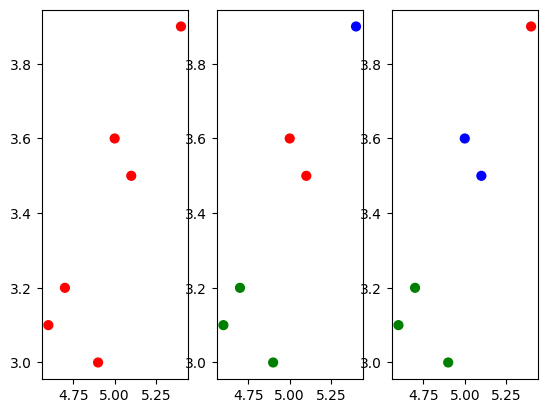

In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
df=pd.read_csv('iris.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
colormap=np.array(["red","green","blue"])
y=y.astype('category')
y=y.cat.codes
gm=GaussianMixture(n_components=3)
gm.fit(x)
gmc=gm.predict(x)
km=KMeans(n_clusters=3)
km.fit(x)
kmc=km.predict(x)
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[y],s=40)
plt.subplot(1,3,2)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[gmc],s=40)
plt.subplot(1,3,3)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[kmc],s=40)
plt.show()

c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


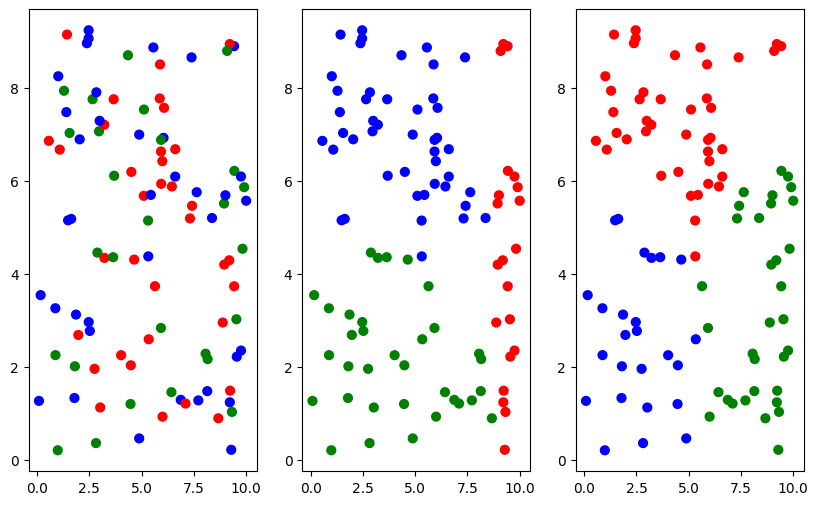

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
n_samples = 100
n_features = 3
X = np.random.rand(n_samples, n_features) * 10  # Scale the data for better visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df.to_csv('random_points.csv', index=False)
x = df.iloc[:, :-1]
y = np.random.randint(0, 3, n_samples)

# Define colormap
colormap = np.array(["red", "green", "blue"])

# Gaussian Mixture Model
gm = GaussianMixture(n_components=3)
gm.fit(x)
gmc = gm.predict(x)

# KMeans Clustering
km = KMeans(n_clusters=3)
km.fit(x)
kmc = km.predict(x)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=colormap[y], s=40)
plt.subplot(1, 3, 2)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=colormap[gmc], s=40)
plt.subplot(1, 3, 3)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=colormap[kmc], s=40)
plt.show()


8. KNN

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

def knn_classifier(data, k):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    # Data normalization
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    return accuracy, conf_matrix, class_report
data = read_csv('8ds.csv')
accuracy, conf_matrix, class_report = knn_classifier(data, 3)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



9. Regression 

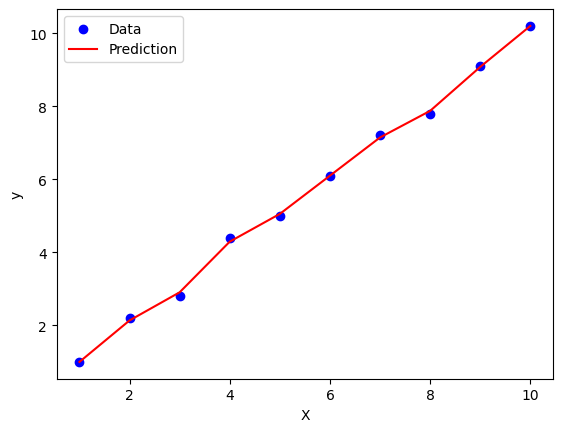

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, tau):
    m = X.shape[0]
    y_pred = np.zeros(m)
    
    for i in range(m):
        w = np.exp(-np.sum((X - X[i, :])**2, axis=1) / (2 * tau**2))
        W = np.diag(w)
        theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
        y_pred[i] = X[i, :] @ theta
    
    return y_pred

# Example usage:
X = np.array([[1, x] for x in np.linspace(1, 10, 10)])
y = np.array([1.0, 2.2, 2.8, 4.4, 5.0, 6.1, 7.2, 7.8, 9.1, 10.2])
tau = 0.5
y_pred = locally_weighted_regression(X, y, tau)

plt.scatter(X[:, 1], y, color='blue', label='Data')
plt.plot(X[:, 1], y_pred, color='red', label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


10. SVM

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

# def preprocess_data(data):
#     # Check if data contains any non-numerical columns
#     print("Data types:\n", data.dtypes)
#     print("Data head:\n", data.head())
    
#     # Ensure no missing values
#     print("Missing values:\n", data.isnull().sum())
    
#     return data

def svm_classifier(data):
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Target
    
    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = SVC()  # Support Vector Classification
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    
    return accuracy, conf_matrix, class_report

# Example usage:
data = read_csv('10ds.csv')
# data = preprocess_data(data)  # Ensure data is properly prepared
accuracy, conf_matrix, class_report = svm_classifier(data)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

